# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Nama : Felix Windriyareksa Hardyan
### NPM : 50421506
### Kelas : 4IA12

### Pertemuan 5 - Semester 7

## 1. Business Understanding

Proyek ini memiliki tujuan yaitu untuk membantu user memprediksi harga penutupan (Closing Price) emas di masa depan berdasarkan beberapa faktor:
1. Harga Buka (Opening Price)
2. Harga Tertinggi (Highest Price)
3. Harga Terendah (Lowest Price)
4. Volume penjualan dan pembelian

## 2. Data Understanding

Proyek ini menggunakan dataset Gold Stock Prices dengan deskripsi berikut ini:

This data set provides a comprehensive record of daily gold prices from January 19, 2014 to January 22, 2024. The data is provided by Nasdaq and includes key financial metrics for each trading day. . The dataset consists of the following columns:

- Date: A unique date for each trading day recorded.
- Close: The closing price of gold on the relevant date.
- Volume: Gold trading volume on the relevant date.
- Open: The opening price of gold on the relevant date.
- High: The highest recorded price of gold during the trading day.
- Low: The lowest price recorded for gold in the trading day.

This data set is valuable for researchers, analysts, and data enthusiasts who want to understand historical trends, patterns, and changes in gold prices over time. Analysts can use this database to perform a variety of analyses, including price forecasting, trend spotting, and market behavior studies.

### A. Import Library dan Load Dataset

In [1]:
# Import Library
import pandas as pd
import numpy as np

In [2]:
# Read csv
df = pd.read_csv("goldstock_v2.csv")
df.head()

,Unnamed: 0,Date,Close/Last,Volume,Open,High,Low
0,0,2024-07-03,2369.4,185930.0,2338.6,2374.5,2335.7
1,1,2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4
2,2,2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2
3,3,2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7
4,4,2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8


### B. Informasi Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close/Last  2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


Dari informasi di atas dapat disimpulkan:
1. Dataset yang digunakan memiliki 7 kolom.
2. Jumlah baris masing-masing kolom yaitu 2511.
3. Tidak terdapat missing data.
4. Kolom Date menggunakan tipe data object dan tipe data ini masih belum sesuai.
5. Kolom Unnamed hanya berguna untuk penomoran.

### C. Melihat Descriptive Statistics dari Dataframe

In [4]:
df.describe()

,Unnamed: 0,Close/Last,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1259.864596,1541.176902,190261.189168,1541.136041,1551.244843,1530.976344
std,728.488698,333.631989,96871.355690,333.699364,336.375007,330.790580
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1251.300000,133774.000000,1250.650000,1258.500000,1243.900000
50%,1259.000000,1409.700000,181273.000000,1404.600000,1418.900000,1401.400000
75%,1888.500000,1832.050000,238157.500000,1833.000000,1844.000000,1819.450000
max,2528.000000,2438.500000,787217.000000,2431.500000,2454.200000,2411.100000


### D. Menghitung IQR dan Mendeteksi Outlier

In [5]:
# Menghitung IQR
q1 = df.select_dtypes(exclude='object').quantile(.25)
q3 = df.select_dtypes(exclude='object').quantile(.75)
iqr = q3 - q1
iqr

Unnamed: 0      1258.00
Close/Last       580.75
Volume        104383.50
Open             582.35
High             585.50
Low              575.55
dtype: float64

In [6]:
# Mendeteksi outlier
outlier_detector = (df.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=['object']) > q3 + 1.5 * iqr)
outlier_detector

,Unnamed: 0,Close/Last,Volume,Open,High,Low
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2506,False,False,False,False,False,False
2507,False,False,False,False,False,False
2508,False,False,False,False,False,False
2509,False,False,False,False,False,False


In [7]:
for col in outlier_detector.columns:
    if df[col].dtype != 'object':
        print('Column Name :', col)
        print(outlier_detector[col].value_counts())
        print('==========================')

Column Name : Unnamed: 0
Unnamed: 0
False    2511
Name: count, dtype: int64
Column Name : Close/Last
Close/Last
False    2511
Name: count, dtype: int64
Column Name : Volume
Volume
False    2433
True       78
Name: count, dtype: int64
Column Name : Open
Open
False    2511
Name: count, dtype: int64
Column Name : High
High
False    2511
Name: count, dtype: int64
Column Name : Low
Low
False    2511
Name: count, dtype: int64


In [8]:
# Persentase outlier
outlier_percentage = len(outlier_detector[outlier_detector.Volume == True]) / len(df['Volume']) * 100
print('Persentase outlier :', outlier_percentage)

Persentase outlier : 3.106332138590203


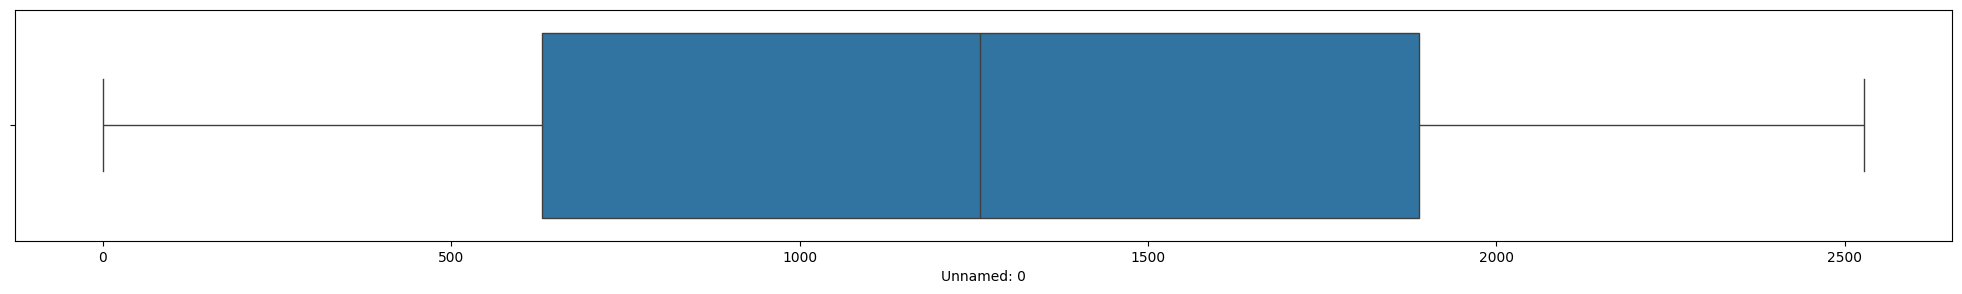

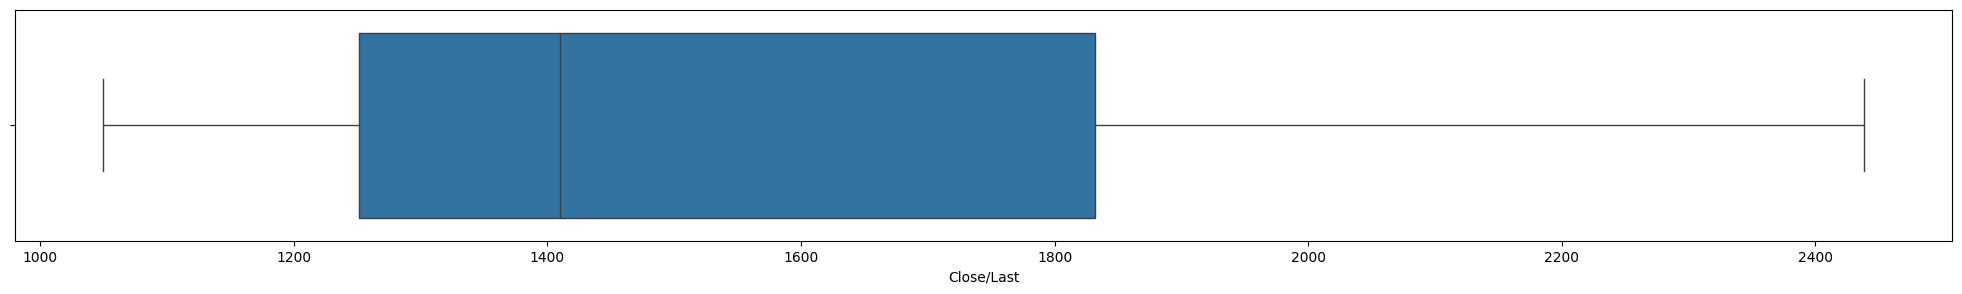

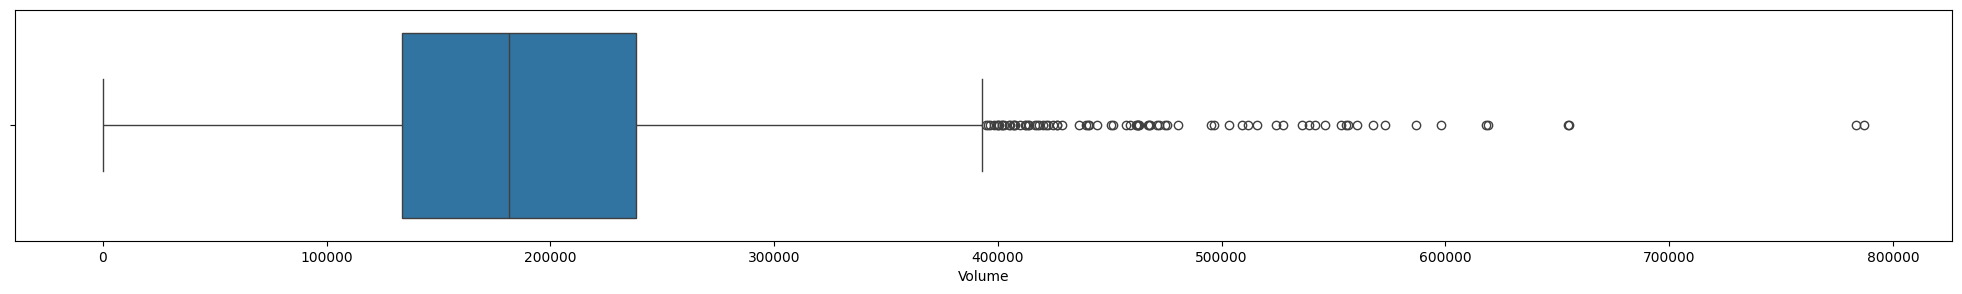

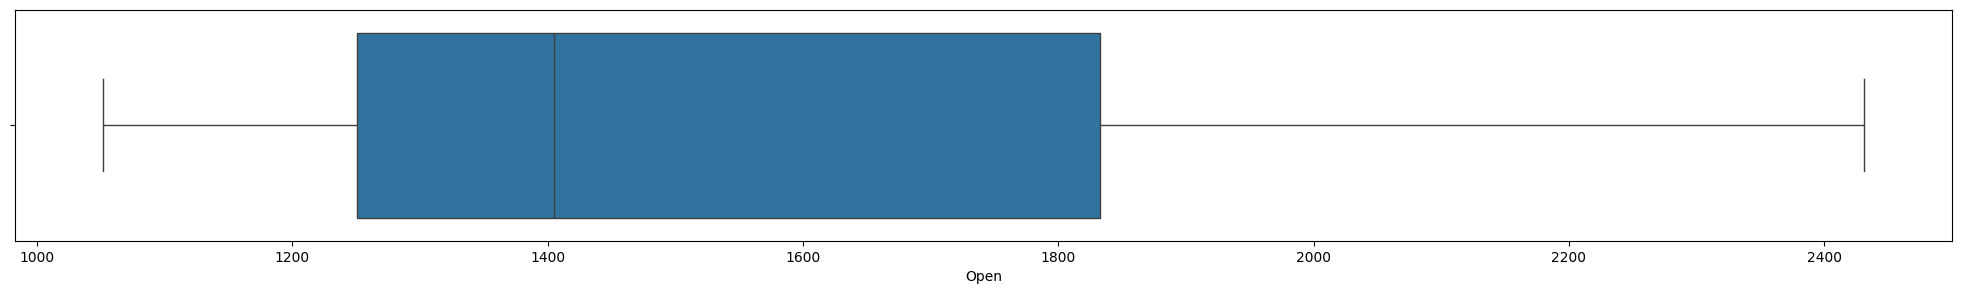

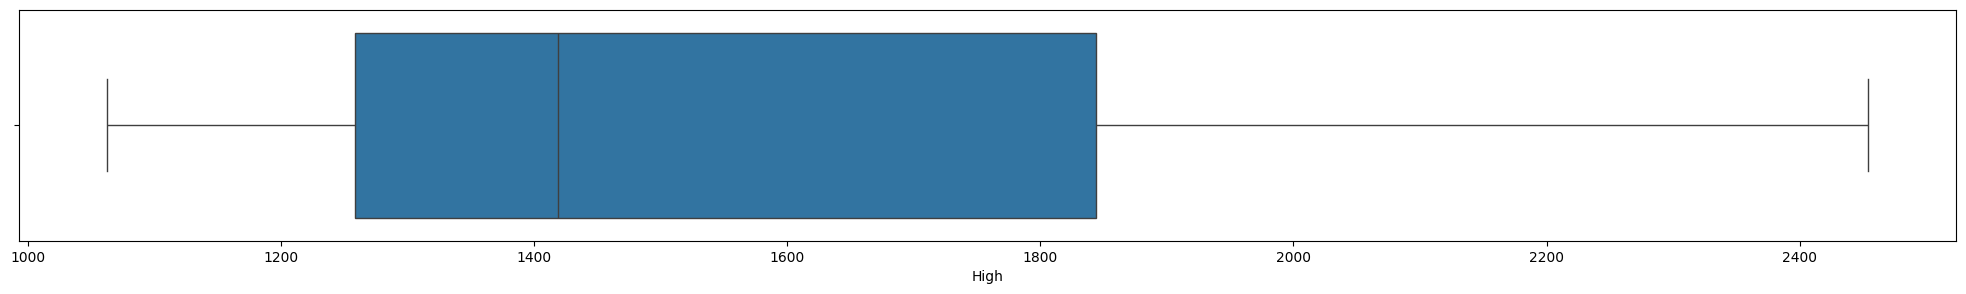

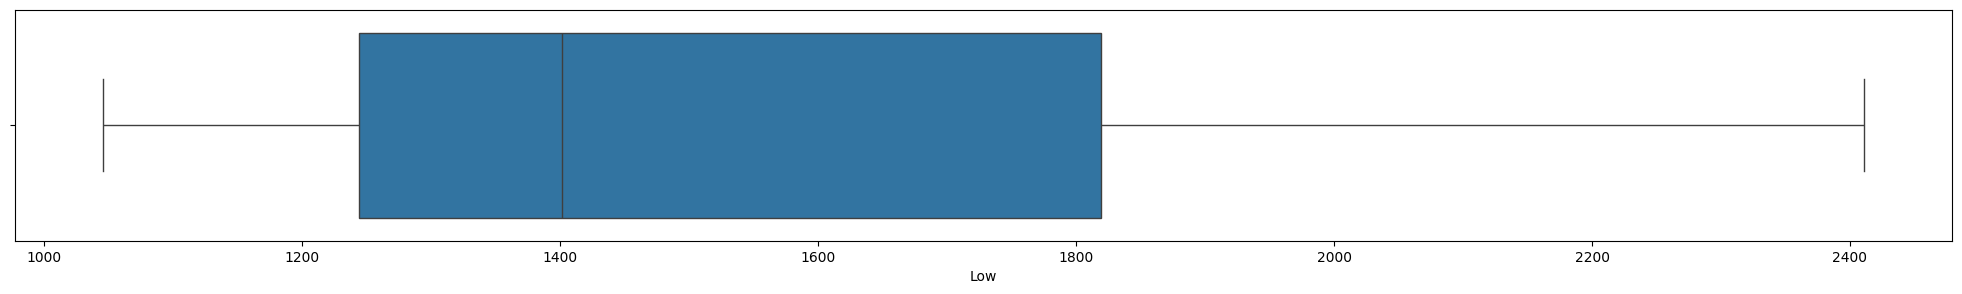

In [9]:
# Visualiasi menggunakan boxplot
import matplotlib.pyplot as plt
import seaborn as sns

df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
    plt.figure(figsize=(25, 3))
    sns.boxplot(data=df_outlier, x=column)

Melalui kode dan visualisasi boxplot di atas dapat disimpulkan bahwa kolom/fitur Volume memiliki outlier sebanyak 78 data

## 3. Data Preparation

### A. Drop Kolom Unnamed

In [10]:
# Melakukan drop pada kolom Unnamed
df= df.iloc[:, 1:7]
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2024-07-03,2369.4,185930.0,2338.6,2374.5,2335.7
1,2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4
2,2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2
3,2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7
4,2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8


### B. Mengganti Tipe Data pada Kolom Date

In [11]:
# Mengubah time menjadi DepartTime
df['Date'] = pd.to_datetime(df['Date']).dt.date
df.set_index('Date', inplace=False)
# Mengurutkan data berdasarkan tanggal
df = df.sort_values('Date')
df.head()

,Date,Close/Last,Volume,Open,High,Low
2510,2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1
2509,2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3
2508,2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7
2507,2014-07-10,1339.2,167391.0,1325.0,1346.8,1325.0
2506,2014-07-11,1337.4,88470.0,1336.5,1340.4,1334.6


### C. Rename Kolom Close/Last menjadi Close

In [12]:
df = df.rename(columns={"Close/Last":"Close"})
df.head()

,Date,Close,Volume,Open,High,Low
2510,2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1
2509,2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3
2508,2014-07-09,1324.3,155101.0,1320.4,1333.4,1318.7
2507,2014-07-10,1339.2,167391.0,1325.0,1346.8,1325.0
2506,2014-07-11,1337.4,88470.0,1336.5,1340.4,1334.6


### D. Mengatasi Missing Data dengan Winsorizing

<Axes: xlabel='Volume'>

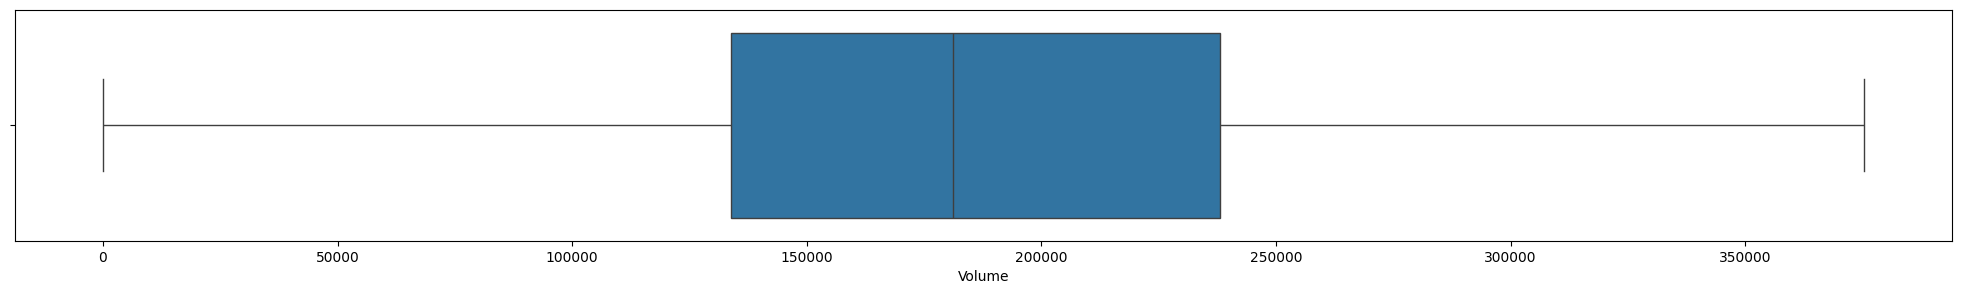

In [13]:
from scipy.stats.mstats import winsorize

# Menghapus outlier pada kolom Length dengan winsorize
df['Volume'] = winsorize(df['Volume'], limits=[0, 0.04])

# Visualisasi boxplot untuk melihat outlier
plt.figure(figsize=(25,3))
sns.boxplot(data=df, x=df['Volume'])

## 4. Modelling

In [14]:
# Menentukan feature (X) dan target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [15]:
# Splitting dataset menjadi training set dan test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2, random_state=42)

In [16]:
# Scaling fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Import model Linear Regression
from sklearn.linear_model import LinearRegression

# Melakukan training model Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Prediksi model
y_pred_linear = linear_model.predict(X_test_scaled)
print("Prediction for test set: {}".format(y_pred_linear))

Prediction for test set: [1236.38753901 2036.27167147 2064.44140763 ... 1972.74221161 2208.78627755
 1230.62398869]


In [19]:
# Evaluasi performa model
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung MSE dan R-Squared
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 33.968453626374775
R-squared Score: 0.9996948047521329


In [20]:
# Membuat dataframe baru yang berisi hasil prediksi
result_df = pd.DataFrame({
    'Date': df.loc[y_test.index, 'Date'],
    'Actual_Price': y_test,
    'Predicted_Price': y_pred_linear,
})

# Mengurutkan dataframe berdasarkan date dan melakukan reset index
result_df = result_df.sort_values('Date').reset_index(drop=True)
result_df.head()

,Date,Actual_Price,Predicted_Price
0,2014-07-07,1317.0,1315.803474
1,2014-07-09,1324.3,1328.297244
2,2014-07-10,1339.2,1339.587662
3,2014-07-14,1306.7,1312.983847
4,2014-07-15,1297.1,1300.900578


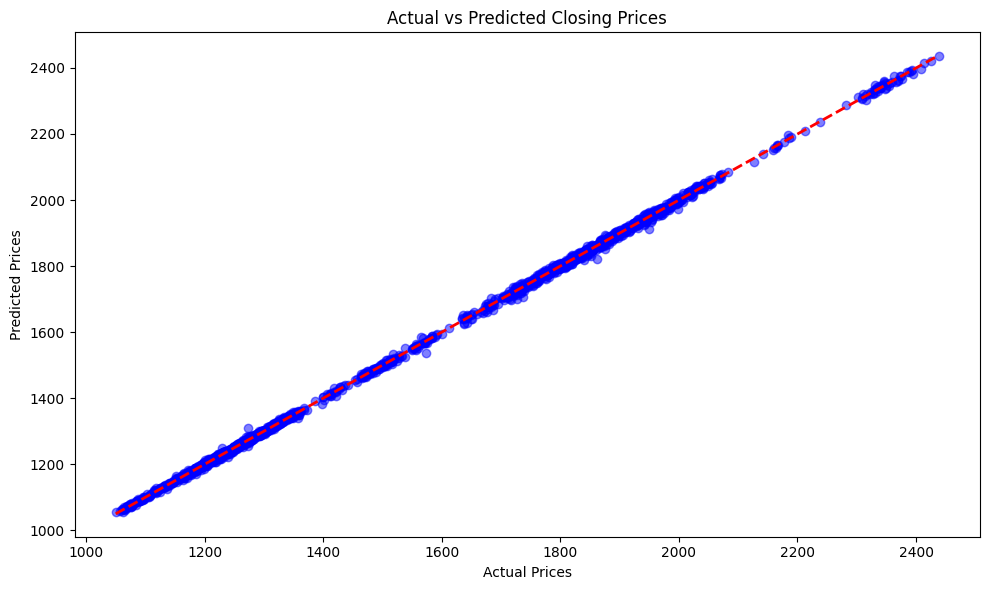

In [21]:
# Visualisasi plot linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.tight_layout()
plt.show()

In [22]:
# Function untuk memprediksi closing price berdasarkan input user
def predict_closing_price():
    print("Enter the following values to predict the closing price of gold:")
    open_price = float(input("Opening Price: "))
    high_price = float(input("Highest Price: "))
    low_price = float(input("Lowest Price: "))
    volume = float(input("Volume: "))
    
    # membuat dataframe baru yang berisi input user
    user_input = pd.DataFrame([[open_price, high_price, low_price, volume]], columns=['Open', 'High', 'Low', 'Volume'])
    
    # Scaling input user
    user_input_scaled = scaler.transform(user_input)
    
    # Membuat prediksi berdasarkan input user
    predicted_price = linear_model.predict(user_input_scaled)
    
    print(f"The predicted closing price of gold is: {predicted_price[0]}")

In [23]:
# Memanggil function predict_closing_price
predict_closing_price()

Enter the following values to predict the closing price of gold:
The predicted closing price of gold is: 2034.6389942777512


## 5. Evaluasi

Dari modelling yang telah dilakukan dapat ditarik beberapa kesimpulan:
1. Model linear regression memiliki nilai mean squared error (MSE) yaitu 33.9
2. Model linear regression memiliki nilai R-Squared yaitu 0.99
3. Model dapat melakukan prediksi harga closing emas baru berdasarkan faktor-faktor yang di-input user

Berdasarkan hasil MSE, R-Squared, dan juga visualisasi Actual vs Predicted Prices di atas maka dapat dikatakan bahwa model ini memiliki performa yang cukup baik. Tujuan project pada bagian Business Understanding juga sudah tercapai.